In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Pauli matrices
sigma_z = sp.Matrix([[1, 0], [0, -1]])
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
identity = sp.eye(2)

In [7]:
# Define variables
t, omega, omega_0, Omega, phi_0, epsilon, omega_m, theta_m, sig_sym_x, sig_sym_y, sig_sym_z, tau, delta = sp.symbols(
    't omega omega_0 Omega phi_0 epsilon omega_m theta_m sigma_x sigma_y sigma_z tau delta', real=True
)
hbar = sp.Symbol('hbar', real=True)  # Reduced Planck constant

In [8]:
Hamiltonian_first_frame = -delta/2 * sigma_z + Omega/2 * (sp.cos(phi_0) * sigma_x + sp.sin(phi_0) * sigma_y) + epsilon * omega_m / Omega * sp.cos(omega_m * t - theta_m) * sigma_z
Hamiltonian_first_frame



Matrix([
[-delta/2 + epsilon*omega_m*cos(omega_m*t - theta_m)/Omega,                     Omega*(-I*sin(phi_0) + cos(phi_0))/2],
[                      Omega*(I*sin(phi_0) + cos(phi_0))/2, delta/2 - epsilon*omega_m*cos(omega_m*t - theta_m)/Omega]])

In [9]:
# Define the state vector
c0, c1 = sp.Function('c0')(t), sp.Function('c1')(t)
psi = sp.Matrix([c0, c1])

# Schrödinger equation: i d/dt |ψ> = H |ψ>
schrodinger_eq = sp.Eq(sp.I * sp.diff(psi, t), Hamiltonian_first_frame * psi)

# Extract the coupled differential equations
lhs = sp.I * sp.diff(psi, t)
rhs = Hamiltonian_first_frame * psi
equs = [sp.Eq(lhs[i], rhs[i]) for i in range(2)]

# Display the equations
# Display the coupled differential equations
equs

# Note: For Floquet analysis, we already have the matrix HF and quasienergies defined in the next cell
# The equations shown here can be solved using Floquet theory by:
# 1. Using the quasienergies we calculated
# 2. Finding the corresponding eigenvectors
# 3. Expressing the solution as a superposition of Floquet modes

# For numerical solutions, you could use:
# - QuTiP library (quantum toolbox in Python) which has Floquet functionality
# - scipy.integrate.odeint for direct numerical integration
# - sympy.dsolve for symbolic solutions of simpler cases

[Eq(I*Derivative(c0(t), t), Omega*(-I*sin(phi_0) + cos(phi_0))*c1(t)/2 + (-delta/2 + epsilon*omega_m*cos(omega_m*t - theta_m)/Omega)*c0(t)),
 Eq(I*Derivative(c1(t), t), Omega*(I*sin(phi_0) + cos(phi_0))*c0(t)/2 + (delta/2 - epsilon*omega_m*cos(omega_m*t - theta_m)/Omega)*c1(t))]

In [10]:
import sympy as sp

# Define variables
delta, Omega, phi_0, epsilon, omega_m, theta_m, lam = sp.symbols('delta Omega phi_0 epsilon omega_m theta_m lam')

# Define Hamiltonian components
H0 = sp.Matrix([
    [-delta/2, Omega/2 * sp.exp(-sp.I * phi_0)],
    [Omega/2 * sp.exp(sp.I * phi_0), delta/2]
])

H1 = sp.Matrix([
    [epsilon * omega_m / (2 * Omega), 0],
    [0, -epsilon * omega_m / (2 * Omega)]
])

H_minus1 = H1.T  # Since it's Hermitian

# Construct truncated Floquet matrix (3x3 block for n=-1, 0, +1)
I2 = sp.eye(2)  # Identity matrix
omega_I = omega_m * I2

HF = sp.BlockMatrix([
    [H0 - omega_I, H1, sp.zeros(2,2)],
    [H_minus1, H0, H1],
    [sp.zeros(2,2), H_minus1, H0 + omega_I]
])

# Manually construct the full 6x6 matrix
HF_full = sp.Matrix([
    [H0 - omega_I, H1, sp.zeros(2, 2)],               # First row
    [H_minus1, H0, H1],                               # Second row
    [sp.zeros(2, 2), H_minus1, H0 + omega_I]          # Third row
])

# Display the full 6x6 matrix
HF_full

# Solve for Floquet exponents (quasienergies)
quasienergies = [sp.simplify(expr) for expr in sp.solve(sp.det(HF_full - lam * sp.eye(6)), lam)]
HF.simplify()


Matrix([
[                    Matrix([
[  -delta/2 - omega_m, Omega*exp(-I*phi_0)/2],
[Omega*exp(I*phi_0)/2,     delta/2 - omega_m]]), Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/(2*Omega)]]),                                                                                                   Matrix([
[0, 0],
[0, 0]])],
[Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/(2*Omega)]]),                     Matrix([
[            -delta/2, Omega*exp(-I*phi_0)/2],
[Omega*exp(I*phi_0)/2,               delta/2]]), Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/(2*Omega)]])],
[                                                                                                  Matrix([
[0, 0],
[0, 0]]), Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/

In [11]:
print(HF)

Matrix([
[                    Matrix([
[  -delta/2 - omega_m, Omega*exp(-I*phi_0)/2],
[Omega*exp(I*phi_0)/2,     delta/2 - omega_m]]), Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/(2*Omega)]]),                                                                                                   Matrix([
[0, 0],
[0, 0]])],
[Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/(2*Omega)]]),                     Matrix([
[            -delta/2, Omega*exp(-I*phi_0)/2],
[Omega*exp(I*phi_0)/2,               delta/2]]), Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/(2*Omega)]])],
[                                                                                                  Matrix([
[0, 0],
[0, 0]]), Matrix([
[epsilon*omega_m/(2*Omega),                          0],
[                        0, -epsilon*omega_m/

In [12]:
quasienergies

[-sqrt(3)*sqrt(-(216*Omega**12*omega_m**4 + 432*Omega**10*delta**2*omega_m**4 - 54*Omega**10*epsilon**2*omega_m**4 + 552*Omega**10*omega_m**6 - 144*Omega**10*omega_m**4*((Omega**6*(-72*Omega**2*omega_m**4 - 72*delta**2*omega_m**4 + 18*epsilon**2*omega_m**4 + 8*omega_m**6 + 3*sqrt(6)*sqrt(omega_m**6*(-2*Omega**10*(16*Omega**6 + 48*Omega**4*delta**2 - 32*Omega**4*omega_m**2 + 48*Omega**2*delta**4 + 24*Omega**2*delta**2*epsilon**2 - 64*Omega**2*delta**2*omega_m**2 + 40*Omega**2*epsilon**2*omega_m**2 + 16*Omega**2*omega_m**4 + 16*delta**6 + 48*delta**4*epsilon**2 - 32*delta**4*omega_m**2 - 24*delta**2*epsilon**2*omega_m**2 + 16*delta**2*omega_m**4 + epsilon**4*omega_m**2 + 24*epsilon**2*omega_m**4) - 8*Omega**8*epsilon**2*(6*delta**6 + 3*delta**4*epsilon**2 - 16*delta**4*omega_m**2 + 6*delta**2*epsilon**2*omega_m**2 + 10*delta**2*omega_m**4 + 3*epsilon**2*omega_m**4) - 4*Omega**6*epsilon**4*(6*delta**6 - 24*delta**4*omega_m**2 + 5*delta**2*epsilon**2*omega_m**2 + 20*delta**2*omega_m**4 + e

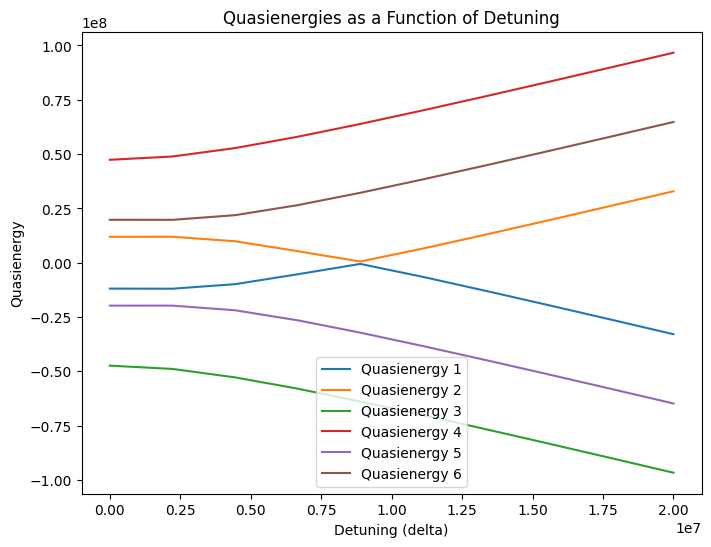

In [13]:
detuning_values = np.linspace(-0, 20*10**6, 10)

# Initialize an empty list to store quasienergy values
quasienergies_values = []

natural_freq = 10 * 10**9
driving_freq = 10 * 10**9
rabi_freq = 5 * 10**6

# CCD parameters
phi_0, epsilon_m, phase_freq, theta_mm = 0, rabi_freq/4, rabi_freq,  0

# Loop over detuning values
for delta_val in detuning_values:
    # Substitute the current detuning and other fixed parameters
    substituted_values = [q.evalf(subs={delta: delta_val*np.pi*2, Omega: np.pi*2*rabi_freq, phi_0: phi_0, epsilon: epsilon_m*np.pi*2, omega_m: np.pi*2*phase_freq, theta_m: theta_mm}) for q in quasienergies]
    quasienergies_values.append([float(sp.re(val)) for val in substituted_values])

# Convert to numpy array for easy plotting
quasienergies_values = np.array(quasienergies_values)

# Plot the quasienergies as a function of detuning
plt.figure(figsize=(8, 6))
for i in range(quasienergies_values.shape[1]):
    plt.plot(detuning_values, quasienergies_values[:, i], label=f'Quasienergy {i+1}')

plt.xlabel('Detuning (delta)')
plt.ylabel('Quasienergy')
plt.title('Quasienergies as a Function of Detuning')
plt.legend()
plt.show()

In [14]:
# print the algebraic forms of the quasi energies in latex with labels corresponding to the quasi energies on the plot
for i, qe in enumerate(quasienergies):
    print(f'Quasienergy {i+1}: {sp.latex(qe)}')

Quasienergy 1: - \frac{\sqrt{3} \sqrt{- \frac{216 \Omega^{12} \omega_{m}^{4} + 432 \Omega^{10} \delta^{2} \omega_{m}^{4} - 54 \Omega^{10} \epsilon^{2} \omega_{m}^{4} + 552 \Omega^{10} \omega_{m}^{6} - 144 \Omega^{10} \omega_{m}^{4} \sqrt[3]{\frac{\Omega^{6} \left(- 72 \Omega^{2} \omega_{m}^{4} - 72 \delta^{2} \omega_{m}^{4} + 18 \epsilon^{2} \omega_{m}^{4} + 8 \omega_{m}^{6} + 3 \sqrt{6} \sqrt{\frac{\omega_{m}^{6} \left(- 2 \Omega^{10} \left(16 \Omega^{6} + 48 \Omega^{4} \delta^{2} - 32 \Omega^{4} \omega_{m}^{2} + 48 \Omega^{2} \delta^{4} + 24 \Omega^{2} \delta^{2} \epsilon^{2} - 64 \Omega^{2} \delta^{2} \omega_{m}^{2} + 40 \Omega^{2} \epsilon^{2} \omega_{m}^{2} + 16 \Omega^{2} \omega_{m}^{4} + 16 \delta^{6} + 48 \delta^{4} \epsilon^{2} - 32 \delta^{4} \omega_{m}^{2} - 24 \delta^{2} \epsilon^{2} \omega_{m}^{2} + 16 \delta^{2} \omega_{m}^{4} + \epsilon^{4} \omega_{m}^{2} + 24 \epsilon^{2} \omega_{m}^{4}\right) - 8 \Omega^{8} \epsilon^{2} \left(6 \delta^{6} + 3 \delta^{4} \epsilon^{2} - 

In [15]:
# print the latex for quasi energy 6
print(f'{sp.latex(quasienergies[5])}')

\frac{\sqrt{3} \sqrt{\frac{216 \Omega^{12} \omega_{m}^{4} + 432 \Omega^{10} \delta^{2} \omega_{m}^{4} - 54 \Omega^{10} \epsilon^{2} \omega_{m}^{4} + 552 \Omega^{10} \omega_{m}^{6} + 72 \Omega^{10} \omega_{m}^{4} \sqrt[3]{\frac{\Omega^{6} \left(- 72 \Omega^{2} \omega_{m}^{4} - 72 \delta^{2} \omega_{m}^{4} + 18 \epsilon^{2} \omega_{m}^{4} + 8 \omega_{m}^{6} + 3 \sqrt{6} \sqrt{\frac{\omega_{m}^{6} \left(2 \Omega^{10} \left(- 16 \Omega^{6} - 48 \Omega^{4} \delta^{2} + 32 \Omega^{4} \omega_{m}^{2} - 48 \Omega^{2} \delta^{4} - 24 \Omega^{2} \delta^{2} \epsilon^{2} + 64 \Omega^{2} \delta^{2} \omega_{m}^{2} - 40 \Omega^{2} \epsilon^{2} \omega_{m}^{2} - 16 \Omega^{2} \omega_{m}^{4} - 16 \delta^{6} - 48 \delta^{4} \epsilon^{2} + 32 \delta^{4} \omega_{m}^{2} + 24 \delta^{2} \epsilon^{2} \omega_{m}^{2} - 16 \delta^{2} \omega_{m}^{4} - \epsilon^{4} \omega_{m}^{2} - 24 \epsilon^{2} \omega_{m}^{4}\right) + 8 \Omega^{8} \epsilon^{2} \left(- 6 \delta^{6} - 3 \delta^{4} \epsilon^{2} + 16 \delta^{4} \ome

In [16]:
# show that in the limit of large detunings quasi energy  6 approaches the effective rabi frequency
qe6 = quasienergies[5]
qe6_limit = qe6.subs(delta, sp.oo)
qe6_limit

sqrt(3)*sqrt((216*Omega**12*omega_m**4 - 54*Omega**10*epsilon**2*omega_m**4 + 552*Omega**10*omega_m**6 + 72*Omega**10*omega_m**4*((Omega**6*(-72*Omega**2*omega_m**4 + 18*epsilon**2*omega_m**4 + 8*omega_m**6 - oo*omega_m**4 + 3*sqrt(6)*sqrt(omega_m**6*(2*Omega**10*(-16*Omega**6 + 32*Omega**4*omega_m**2 - oo*Omega**4 - 40*Omega**2*epsilon**2*omega_m**2 - oo*Omega**2*epsilon**2 - 16*Omega**2*omega_m**4 + oo*Omega**2*omega_m**2 - oo*Omega**2 - epsilon**4*omega_m**2 - 24*epsilon**2*omega_m**4 + oo*epsilon**2*omega_m**2 - oo*epsilon**2 - oo*omega_m**4 + oo*omega_m**2 - oo) + 8*Omega**8*epsilon**2*(-3*epsilon**2*omega_m**4 - oo*epsilon**2*omega_m**2 - oo*epsilon**2 - oo*omega_m**4 + oo*omega_m**2 - oo) + 4*Omega**6*epsilon**4*(-epsilon**2*omega_m**4 - oo*epsilon**2*omega_m**2 - oo*omega_m**4 + oo*omega_m**2 - oo) + oo*Omega**4*epsilon**6*(-10*omega_m**4 + oo*omega_m**2 - oo) + oo*Omega**2*epsilon**8*omega_m**2*(-5*omega_m**2 + oo) - oo*epsilon**10*omega_m**4)/Omega**10)) + 12*Omega**4*epsilon

In [17]:
# plot quasi energy 6 for a range of detuning values along with the effective rabi frequency
detuning_values = np.linspace(-0, 20*10**6, 30)
substituted_values = [float(sp.re(quasienergies[5].evalf(subs={delta: delta_val*np.pi*2, Omega: np.pi*2*rabi_freq, phi_0: phi_0, epsilon: epsilon_m*np.pi*2, omega_m: np.pi*2*phase_freq, theta_m: theta_mm}))) for delta_val in detuning_values]
effective_rabi_energies = [np.sqrt((2*np.pi*rabi_freq)**2 + (delta_val*np.pi*2)**2) for delta_val in detuning_values]


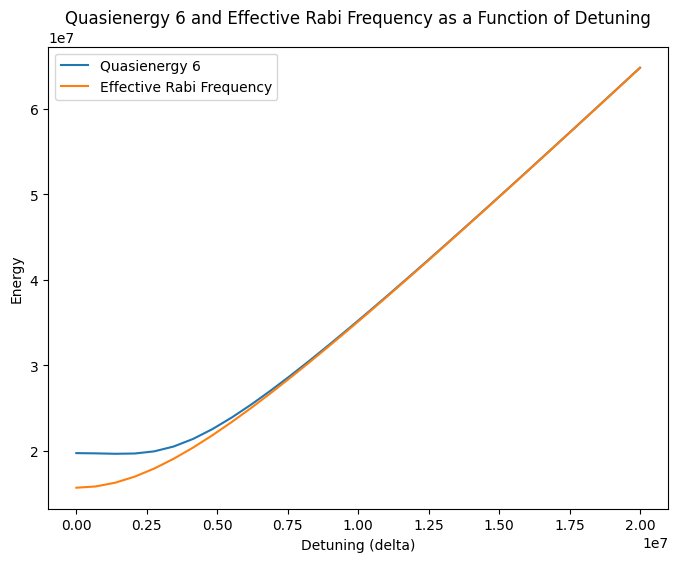

In [18]:
# Plot the quasienergies as a function of detuning
plt.figure(figsize=(8, 6))
plt.plot(detuning_values, np.array(substituted_values), label='Quasienergy 6')
plt.plot(detuning_values, (1/2)*np.array(effective_rabi_energies), label='Effective Rabi Frequency')
plt.xlabel('Detuning (delta)')
plt.ylabel('Energy')
plt.title('Quasienergy 6 and Effective Rabi Frequency as a Function of Detuning')
plt.legend()
plt.show()

# Thoughts


I am confusing my self with the 2pis? or lack there of?
surely I am using rads?? what am I pumping into the transformation in unravelling_ccd
ok so this is definitely in radians so essentially it doesnt matter

In [34]:
floq = float(sp.re(quasienergies[5].evalf(subs={delta: 0*np.pi*2, Omega: np.pi*2*rabi_freq, phi_0: phi_0, epsilon: epsilon_m*np.pi*2, omega_m: np.pi*2*phase_freq, theta_m: theta_mm})))


In [35]:
floq/np.sqrt((2*np.pi*rabi_freq)**2 + (0*np.pi*2)**2)

np.float64(0.6287239042606679)

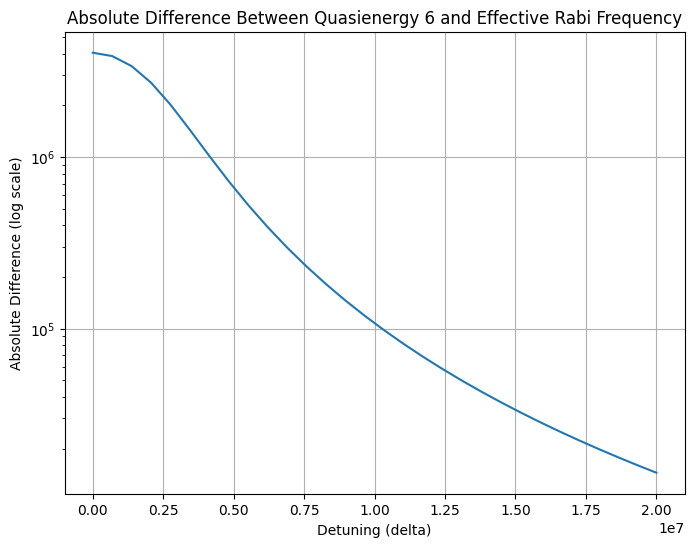

In [20]:
# plot the difference on a log scale
plt.figure(figsize=(8, 6))
plt.semilogy(detuning_values, abs(np.array(substituted_values) -(1/2)* np.array(effective_rabi_energies)))
plt.xlabel('Detuning (delta)')
plt.ylabel('Absolute Difference (log scale)')
plt.title('Absolute Difference Between Quasienergy 6 and Effective Rabi Frequency')
plt.grid(True)
plt.show()


In [21]:

def find_min_qe2(delta_min, delta_max, num_points, iterations=3):
    best_delta = None
    min_value = float('inf')
    
    for iteration in range(iterations):
        # Create range for this iteration
        delta_range = np.linspace(delta_min, delta_max, num_points)
        
        # Calculate values
        qe2_values = [float(sp.re(qe2.evalf(subs={
            delta: d*np.pi*2, 
            Omega: np.pi*2*rabi_freq, 
            phi_0: phi_0, 
            epsilon: epsilon_m*np.pi*2, 
            omega_m: np.pi*2*phase_freq, 
            theta_m: theta_mm
        }))) for d in delta_range]
        
        # Find minimum in this range
        min_idx = np.argmin(qe2_values)
        if qe2_values[min_idx] < min_value:
            min_value = qe2_values[min_idx]
            best_delta = delta_range[min_idx]
        
        # Zoom in around the minimum for next iteration
        step_size = (delta_max - delta_min) / num_points
        delta_min = best_delta - 5*step_size
        delta_max = best_delta + 5*step_size

    return best_delta, min_value


qe2 = quasienergies[1]
# Initial search range
delta_min, delta_max = 8.5*10**6, 8.8*10**6
min_delta, min_value = find_min_qe2(delta_min, delta_max, 50, iterations=1)

print(f"Found minimum at detuning = {min_delta:.2f} Hz")
print(f"Minimum value = {min_value:.2e}")


Found minimum at detuning = 8751020.41 Hz
Minimum value = 4.16e+05


## Save the function for quasi-energy

In [25]:
print(quasienergies[5])
symbols_in_expr = quasienergies[5].free_symbols
symbols_in_expr

sqrt(3)*sqrt((216*Omega**12*omega_m**4 + 432*Omega**10*delta**2*omega_m**4 - 54*Omega**10*epsilon**2*omega_m**4 + 552*Omega**10*omega_m**6 + 72*Omega**10*omega_m**4*((Omega**6*(-72*Omega**2*omega_m**4 - 72*delta**2*omega_m**4 + 18*epsilon**2*omega_m**4 + 8*omega_m**6 + 3*sqrt(6)*sqrt(omega_m**6*(2*Omega**10*(-16*Omega**6 - 48*Omega**4*delta**2 + 32*Omega**4*omega_m**2 - 48*Omega**2*delta**4 - 24*Omega**2*delta**2*epsilon**2 + 64*Omega**2*delta**2*omega_m**2 - 40*Omega**2*epsilon**2*omega_m**2 - 16*Omega**2*omega_m**4 - 16*delta**6 - 48*delta**4*epsilon**2 + 32*delta**4*omega_m**2 + 24*delta**2*epsilon**2*omega_m**2 - 16*delta**2*omega_m**4 - epsilon**4*omega_m**2 - 24*epsilon**2*omega_m**4) + 8*Omega**8*epsilon**2*(-6*delta**6 - 3*delta**4*epsilon**2 + 16*delta**4*omega_m**2 - 6*delta**2*epsilon**2*omega_m**2 - 10*delta**2*omega_m**4 - 3*epsilon**2*omega_m**4) + 4*Omega**6*epsilon**4*(-6*delta**6 + 24*delta**4*omega_m**2 - 5*delta**2*epsilon**2*omega_m**2 - 20*delta**2*omega_m**4 - eps

{Omega, delta, epsilon, omega_m}

In [27]:
import pickle
import numpy as np
from sympy import symbols, sin, lambdify

# Get the expression and symbols
expr = quasienergies[5]
symbol_list = tuple(sorted(expr.free_symbols, key=lambda s: s.name))

# Save the symbolic expression and symbol list
data_to_save = {
    'expression': expr,
    'symbols': symbol_list
}

# Save the symbolic data using pickle
with open('ccd_quasienergy_6.pkl', 'wb') as f_out:
    pickle.dump(data_to_save, f_out)

In [29]:
# Load the saved symbolic data
with open('ccd_quasienergy_6.pkl', 'rb') as f_in:
    loaded_data = pickle.load(f_in)

expr = loaded_data['expression'] 
symbol_list = loaded_data['symbols']

# Calculate value using same parameters
value = float(sp.re(expr.evalf(subs={
    delta: 20*10**6*np.pi*2,
    Omega: np.pi*2*rabi_freq,
    phi_0: phi_0,
    epsilon: epsilon_m*np.pi*2,
    omega_m: np.pi*2*phase_freq,
    theta_m: theta_mm
})))

print(f"Quasienergy value: {value}")

Quasienergy value: 64780073.21345833
